In [28]:
#import libraries
import pandas as pd
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler,OrdinalEncoder

from sklearn.impute import SimpleImputer



## Load data

In [2]:
df1 = pd.read_csv("../data/kmerdata.csv", index_col="sample_id")
df2 = pd.read_csv("../data/kmerdata1.csv", index_col="sample_id")


In [3]:
df1.head()

,AAAAAAAAAAAAAAAAAAAAAAAAAAA,GGGATTACAGGCACCTGCCACCACACC,GCCTGGCTAATTTTTATATTTTTAGTA,GGCTGGGCACGGTGGCTCACGCCTGTA,AGGCAGGAGAATGGCATGAACCCGGGA,GCTTCTGCACAGCAAAAGAAACTATCA,ACGCCATTGCACTCCAGCCTGGGCAAC,TCTTGGGAGGGTGTATGTGTCGAGGAA,AGTCTTGCTCTGTCTCCCAGGCTGGAG,CCAAAAAAGAGCCCGCATTGCCAAGTC,...,CATTCCATTCCATTCCATTCCACTCGG,ACAACCGGTACCAGCCGCTGCAAAATC,AGGATCACTTGAGCCCAGGAGGTTGAG,CTCCCGACCTCAGGTGATCCACCCGCC,AAAAAAAAAAAAAAAAGAAAAAAAAAA,CTGCACTCTAGCCTGGGCAACAGAGCA,GCAATGGCGCAATCTCAGCTCACTGCA,CAAGTAGCTGGGACTACAGGCACCCAC,AGGCTGGTCTCAAACTCCTGACTTCAG,GAAGGAAGGGAGGGAGGGAGGGAGGGA
sample_id,,,,,,,,,,,,,,,,,,,,,
NA19719,184095,1371.0,1388.0,3083.0,5722.0,3408.0,3282.0,1147.0,1502.0,1401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19704,183996,1372.0,1394.0,3059.0,5737.0,3402.0,3288.0,1145.0,1509.0,1397.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19675,184427,1386.0,1382.0,3076.0,5726.0,3411.0,3284.0,1143.0,1515.0,1394.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19670,184133,1383.0,1390.0,3076.0,5723.0,3408.0,3278.0,1147.0,1512.0,1393.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19669,183749,1390.0,1381.0,3065.0,5743.0,3406.0,3287.0,1147.0,1508.0,1398.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2.head()

,AAAAAAAAAAAAAAAAAAAAAAAAAAA,GGGATTACAGGCACCTGCCACCACACC,GCCTGGCTAATTTTTATATTTTTAGTA,GGCTGGGCACGGTGGCTCACGCCTGTA,AGGCAGGAGAATGGCATGAACCCGGGA,GCTTCTGCACAGCAAAAGAAACTATCA,ACGCCATTGCACTCCAGCCTGGGCAAC,TCTTGGGAGGGTGTATGTGTCGAGGAA,AGTCTTGCTCTGTCTCCCAGGCTGGAG,CCAAAAAAGAGCCCGCATTGCCAAGTC,...,GGATCGCTTGAGCCCAGGAGTTTGAGA,AAAAAAAAAAAAAAAAGAAAAAAAAAA,GCAGTGAGCTATGATTGCACCACTGCA,ATTCTCCTGCCTCAGCCTCCCGAGTAC,GAAGGAAGGGAGGGAGGGAGGGAGGGA,AACTTAAAGTATAATAATAAAAAAAAA,GGAGTGCAGTGGCACAATCATGGCTCA,CTCCTAATGCTATCCCTCCCCTAGCCC,CGTCTCAAAAAAAAAAAAAAAAAGAAA,ATTGTTCAATTCCCATCTATGAGTGAG
sample_id,,,,,,,,,,,,,,,,,,,,,
NA19720,184202,1362,1376,3065,5756,3408,3288,1143,1514,1394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19719,184095,1371,1388,3083,5722,3408,3282,1147,1502,1401,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19678,184783,1387,1386,3053,5746,3397,3275,1148,1499,1397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19676,183970,1389,1390,3065,5722,3402,3279,1143,1507,1395,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19468,182214,1462,1387,3084,5750,3413,3287,1146,1514,1397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = pd.concat([df1,df2])
df.head()

,AAAAAAAAAAAAAAAAAAAAAAAAAAA,GGGATTACAGGCACCTGCCACCACACC,GCCTGGCTAATTTTTATATTTTTAGTA,GGCTGGGCACGGTGGCTCACGCCTGTA,AGGCAGGAGAATGGCATGAACCCGGGA,GCTTCTGCACAGCAAAAGAAACTATCA,ACGCCATTGCACTCCAGCCTGGGCAAC,TCTTGGGAGGGTGTATGTGTCGAGGAA,AGTCTTGCTCTGTCTCCCAGGCTGGAG,CCAAAAAAGAGCCCGCATTGCCAAGTC,...,CTATTATTGTGTGGGAGTCTAAGTCTC,CTCGGGAGGCTGAGGCAGAAGAATCAC,AGGTTGCAGTGAGCCAAGATGGTGCCA,CCTGAAAGTGACAGGGAGAATGGAACC,CAGGAGTTTGAGACCAGCCTAGCCAAC,AGCCGGGCATGGTGGCGGGTGCCTGTA,GGATCGCTTGAGCCCAGGAGTTTGAGA,AACTTAAAGTATAATAATAAAAAAAAA,CTCCTAATGCTATCCCTCCCCTAGCCC,CGTCTCAAAAAAAAAAAAAAAAAGAAA
sample_id,,,,,,,,,,,,,,,,,,,,,
NA19719,184095,1371.0,1388.0,3083.0,5722.0,3408.0,3282.0,1147.0,1502.0,1401.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19704,183996,1372.0,1394.0,3059.0,5737.0,3402.0,3288.0,1145.0,1509.0,1397.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19675,184427,1386.0,1382.0,3076.0,5726.0,3411.0,3284.0,1143.0,1515.0,1394.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19670,184133,1383.0,1390.0,3076.0,5723.0,3408.0,3278.0,1147.0,1512.0,1393.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA19669,183749,1390.0,1381.0,3065.0,5743.0,3406.0,3287.0,1147.0,1508.0,1398.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_clean = df.drop(["HG02061","NA19704"],axis=0)
df_clean.code.value_counts() 

MXL    8
LWK    6
GBR    4
STU    3
Name: code, dtype: int64

In [8]:
# fill NaNs in the data frame with 0
df_clean.fillna(0,inplace=True)

In [36]:
df2.fillna(0,inplace=True)

In [87]:
country={"MXL":0,"LWK":1,"GBR":2,"STU":3}
df2["Population"]=df2["code"].replace(country)
df2["Population"]

sample_id
NA19720    0
NA19719    0
NA19678    0
NA19676    0
NA19468    1
NA19456    1
NA19454    1
NA19440    1
HG00238    2
HG00236    2
HG00235    2
HG00234    2
Name: Population, dtype: int64

In [89]:
#drop Code
df2.drop("code",axis=1, inplace=True)

## Explore

<AxesSubplot:>

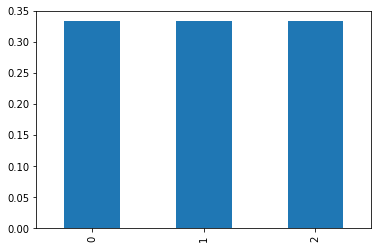

In [91]:
df2["Population"].value_counts(normalize=True).plot(kind="bar")


## Split data

In [93]:
target = "Population"
X =df2.drop(columns=target)
y = df2[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (12, 32330)
y shape: (12,)


In [112]:
col=X.columns
df3=pd.DataFrame(columns=col)
df3.to_csv("col_names")

In [94]:
X.head()

,AAAAAAAAAAAAAAAAAAAAAAAAAAA,GGGATTACAGGCACCTGCCACCACACC,GCCTGGCTAATTTTTATATTTTTAGTA,GGCTGGGCACGGTGGCTCACGCCTGTA,AGGCAGGAGAATGGCATGAACCCGGGA,GCTTCTGCACAGCAAAAGAAACTATCA,ACGCCATTGCACTCCAGCCTGGGCAAC,TCTTGGGAGGGTGTATGTGTCGAGGAA,AGTCTTGCTCTGTCTCCCAGGCTGGAG,CCAAAAAAGAGCCCGCATTGCCAAGTC,...,GGATCGCTTGAGCCCAGGAGTTTGAGA,AAAAAAAAAAAAAAAAGAAAAAAAAAA,GCAGTGAGCTATGATTGCACCACTGCA,ATTCTCCTGCCTCAGCCTCCCGAGTAC,GAAGGAAGGGAGGGAGGGAGGGAGGGA,AACTTAAAGTATAATAATAAAAAAAAA,GGAGTGCAGTGGCACAATCATGGCTCA,CTCCTAATGCTATCCCTCCCCTAGCCC,CGTCTCAAAAAAAAAAAAAAAAAGAAA,ATTGTTCAATTCCCATCTATGAGTGAG
sample_id,,,,,,,,,,,,,,,,,,,,,
NA19720,184202,1362,1376,3065,5756,3408,3288,1143,1514,1394,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA19719,184095,1371,1388,3083,5722,3408,3282,1147,1502,1401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA19678,184783,1387,1386,3053,5746,3397,3275,1148,1499,1397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA19676,183970,1389,1390,3065,5722,3402,3279,1143,1507,1395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NA19468,182214,1462,1387,3084,5750,3413,3287,1146,1514,1397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [96]:
# Build Model
model = make_pipeline(StandardScaler(),DecisionTreeClassifier(max_depth=6,random_state=42))
# Fit model to training data
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])

In [97]:
acc_train = model.score(X_train,y_train)
acc_test =model.score(X_test,y_test)
print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.6667


In [ ]:
model.p

In [99]:
model.predict_proba(X_test)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [100]:
y_test

sample_id
HG00235    2
NA19454    1
NA19678    0
Name: Population, dtype: int64

In [101]:
model.predict(X_test)

array([1, 1, 0])

<AxesSubplot:>

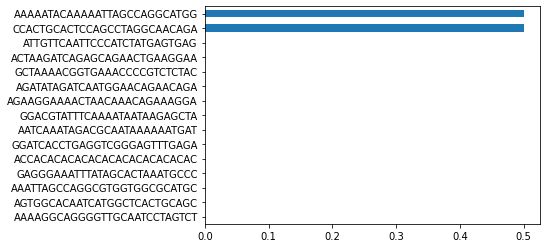

In [105]:
# Get importances
importances = model.named_steps["decisiontreeclassifier"].feature_importances_


# Put importances into a Series
feat_imp = pd.Series(importances,index=X_train.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")


In [106]:
feat_importances = pd.Series(model.named_steps["decisiontreeclassifier"], index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

TypeError: Cannot use method 'nlargest' with dtype object

In [107]:
# Save your model as `"model-5-2.pkl"`
with open("ANCmodel.pkl","wb") as f:
    pickle.dump(model,f)

In [52]:
import pickle

In [108]:
# Load `"model-5-2.pkl"`
with open("ANCmodel.pkl","rb") as f:
    loaded_model=pickle.load(f)
print(loaded_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=6, random_state=42))])


In [117]:
loaded_model.predict(X_test)

array([1, 1, 0])

In [118]:
loaded_model.predict_proba(X_test)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix
  

from sklearn.svm import SVC
  
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.6666666666666666


In [114]:
prediction.score(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [64]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[0 0 0]
 [1 1 0]
 [0 0 1]]


In [65]:
svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)
  
prediction = svc_model.predict(X_test)
  
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8888888888888888
0.6666666666666666


In [66]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[0 0 0]
 [1 1 0]
 [0 0 1]]


In [67]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [69]:
importance = model.tree_


In [70]:
importance